Author: Justus Heilingbrunner
***

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from IPython.display import display, Markdown

# ### Scaling
# from sklearn.preprocessing import RobustScaler

# ### HAC
# from sklearn import cluster
# from scipy.cluster.hierarchy import dendrogram, linkage
# # CPCC
# from scipy.cluster.hierarchy import cophenet
# from scipy.spatial.distance import pdist

# ### EM
# from sklearn.mixture import GaussianMixture

# ### PCA
# from sklearn.decomposition import PCA
# from pca import pca

In [40]:
import requests
import dotenv
import re
import pandas as pd
import time
from sklearn.model_selection import train_test_split


In [15]:
# from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import random
import os 

import torch
import torch.nn as nn

torch.set_default_dtype(torch.float)

import mads_dl

random.seed(43)
np.random.seed(23)
torch.manual_seed(42)
os.environ["PYTHONHASHSEED"] = "42"
torch.use_deterministic_algorithms(True)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
torch.set_num_threads(1)

***
***
# The Data



## Hub List all time + pick up and drop offs.csv

In [37]:
df = pd.read_csv('Data/Hub List all time + pick up and drop offs.csv')
df.head()

,id,name,state,created_at,maximum_capacity,pickups,dropoffs
0,30467,Stadtwerke Pop-Up,public,2024-09-12 12:45:29.843902,0,4,1
1,30466,Mobilitätsfest Pop-up,public,2024-09-12 12:07:04.481416,0,15,16
2,30464,Pop Up Rathaus event,public,2024-09-12 07:25:05.597799,20,7,3
3,30434,Felde Gemeindezentrum,public,2024-09-08 09:01:16.289455,18,7,9
4,30420,IPN Pop Up,disabled,2024-09-05 20:53:56.364054,10,0,0


In [38]:
df.head(233)

,id,name,state,created_at,maximum_capacity,pickups,dropoffs
0,30467,Stadtwerke Pop-Up,public,2024-09-12 12:45:29.843902,0,4,1
1,30466,Mobilitätsfest Pop-up,public,2024-09-12 12:07:04.481416,0,15,16
2,30464,Pop Up Rathaus event,public,2024-09-12 07:25:05.597799,20,7,3
3,30434,Felde Gemeindezentrum,public,2024-09-08 09:01:16.289455,18,7,9
4,30420,IPN Pop Up,disabled,2024-09-05 20:53:56.364054,10,0,0
...,...,...,...,...,...,...,...
228,24371,Anleger Reventlou,public,2022-12-19 13:18:10.719836,50,30232,30138
229,24370,Alter Markt,public,2022-12-19 13:18:10.313777,25,15439,15676
230,24369,Alte Mu/Brunswiker Str.,public,2022-12-19 13:18:09.902522,15,7544,7593
231,24368,Umsteiger,public,2022-12-19 13:18:09.467309,20,7633,7629


In [40]:
df['name'].nunique(), df['id'].nunique()

(233, 233)

In [42]:
df['name'].unique()

array(['Stadtwerke Pop-Up', 'Mobilitätsfest Pop-up',
       'Pop Up Rathaus event', 'Felde Gemeindezentrum', 'IPN Pop Up ',
       'SH Netz Cup Pop Up', 'Wankendorf Zob', 'Sporthalle Saxtorfer Weg',
       'Osterby Veranstaltung Pop Up ', 'Hohes Arsenal', 'Jungmannufer',
       'Eiche Dänischenhagen', 'Bushaltestelle Eiderbrücke',
       'Herzog-Friedrich-Straße (ZOB)', 'Rondeel', 'VHS Kurs ',
       'TÖZ Eckernförde ', 'Martinshaus', 'Pop-up Barsbek Korntage',
       'Pop Up VeloCenter ', 'REWE Klausdorf', 'Ostseepark',
       'Stadtwerke / Bürgerhaus Klausdorf', 'Bahnhof Raisdorf',
       'Freibad Raisdorf (saisonal bis 22.09.24)',
       'Rathaus Schwentinental', 'Pop-up Seewiese Bünsdorf',
       'Eiderbad Saison-Station', 'Kiwo Sparkassen Service',
       'B502 Schönkirchener Straße ', 'Langer Rehm P+R',
       'Langer Rehm (Rewe)', 'Wörthstraße', 'KiWo Willestraße ',
       'ab 12 Uhr - KiWo Nordeingang', 'ab 12 Uhr - KiWo Südeingang',
       'KiWo Nordmarksportfeld', 'KiWo Prinz

In [43]:
df['id'].unique()

array([30467, 30466, 30464, 30434, 30420, 30390, 30282, 30207, 30185,
       30156, 30155, 30151, 30147, 30146, 30145, 30126, 30121, 30120,
       30095, 30084, 30027, 30026, 30025, 30024, 30023, 30022, 30011,
       29982, 29974, 29965, 29964, 29963, 29946, 29942, 29941, 29940,
       29939, 29938, 29937, 29936, 29935, 29934, 29933, 29745, 29663,
       29347, 29346, 29345, 29253, 29224, 29200, 29198, 29147, 29112,
       29109, 29083, 29049, 28932, 28814, 28813, 28812, 28811, 28804,
       28803, 28802, 28801, 28800, 28799, 28798, 28797, 28796, 28795,
       28794, 28793, 28792, 28791, 28790, 28789, 28749, 28738, 28264,
       27717, 27567, 27452, 27451, 27450, 27449, 27448, 27447, 27446,
       27445, 27444, 27443, 27442, 27441, 27440, 27382, 27381, 27380,
       27379, 27378, 27377, 27376, 27375, 27374, 27373, 27372, 27209,
       27183, 26889, 26805, 26730, 26725, 26724, 26708, 26653, 26224,
       26209, 24602, 24482, 24481, 24479, 24478, 24477, 24476, 24475,
       24474, 24473,

**Hub List all time + pick up and drop offs.csv | Features:**

1. **id**: 
2. **name**: 
3. **state**: 
4. **created_at**: 
5. **maximum_capacity**: 
6. **pickups**: 
7. **dropoffs**: 

In [7]:
print('number of missing values:', df.isnull().sum().sum())
print('number of NaN values:', df.isna().sum().sum())
df.info()

number of missing values: 0
number of NaN values: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                233 non-null    int64 
 1   name              233 non-null    object
 2   state             233 non-null    object
 3   created_at        233 non-null    object
 4   maximum_capacity  233 non-null    int64 
 5   pickups           233 non-null    int64 
 6   dropoffs          233 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 12.9+ KB


In [21]:
# look at dataset
print('Shape:', df.shape)
print('Columns:', df.columns)
print('\ndifferent names:', df['name'].nunique())
print('unique states:', df['state'].nunique())
print(df['state'].unique())
print('\nmaximal capacity:', df['maximum_capacity'].max())
print('minimal capacity:', df['maximum_capacity'].min())
print(df['maximum_capacity'].unique())
print('\n')
print(df['maximum_capacity'].value_counts()[:5])

Shape: (233, 7)
Columns: Index(['id', 'name', 'state', 'created_at', 'maximum_capacity', 'pickups',
       'dropoffs'],
      dtype='object')

different names: 233
unique states: 3
['public' 'disabled' 'fellows']

maximal capacity: 150
minimal capacity: 0
[  0  20  18  10   7  15  16  12  50   6  30  25 150  19  14  40  21  80
  35]


maximum_capacity
15    78
20    58
30    28
0     23
25    20
Name: count, dtype: int64


## 2024 - Hub ID & Drop Off - Pick Up numbers.csv

In [4]:
df_time = pd.read_csv('Data/2024 - Hub ID & Drop Off - Pick Up numbers.csv', sep=';')
df_time.head()

,hub_id,Days in full_date,Average bike_count,# of unique dropoff_hub_id,# of unique pickup_hub_id
0,2180.0,01/01/2024,6.282412,NaN,NaN
1,2180.0,02/01/2024,6.080100,NaN,NaN
2,2180.0,04/01/2024,6.078173,NaN,NaN
3,2180.0,05/01/2024,5.936238,NaN,NaN
4,2180.0,07/01/2024,6.443539,NaN,NaN


**2024 - Hub ID & Drop Off - Pick Up numbers.csv | Features:**

1. **hub_id**: 
2. **days in full_date**: 
3. **Average bike_count**: 
4. **# of unique dropoff_hub_id**: 
5. **# of unique pcikup_hub_id**: 

In [8]:
print('number of missing values:', df_time.isnull().sum().sum())
print('number of NaN values:', df_time.isna().sum().sum())
df_time.info()

number of missing values: 446
number of NaN values: 446
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6930 entries, 0 to 6929
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   hub_id                      6930 non-null   float64
 1   Days in full_date           6930 non-null   object 
 2   Average bike_count          6930 non-null   float64
 3   # of unique dropoff_hub_id  6707 non-null   float64
 4   # of unique pickup_hub_id   6707 non-null   float64
dtypes: float64(4), object(1)
memory usage: 270.8+ KB


In [6]:
# look at dataset
print('Shape:', df_time.shape)
print('Columns:', df_time.columns)

Shape: (6930, 5)
Columns: Index(['hub_id', 'Days in full_date', 'Average bike_count',
       '# of unique dropoff_hub_id', '# of unique pickup_hub_id'],
      dtype='object')


***

## Grafiken

In [59]:
df_time.head()

,hub_id,Days in full_date,Average bike_count,# of unique dropoff_hub_id,# of unique pickup_hub_id
0,2180.0,01/01/2024,6.282412,NaN,NaN
1,2180.0,02/01/2024,6.080100,NaN,NaN
2,2180.0,04/01/2024,6.078173,NaN,NaN
3,2180.0,05/01/2024,5.936238,NaN,NaN
4,2180.0,07/01/2024,6.443539,NaN,NaN


In [60]:
df_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6930 entries, 0 to 6929
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   hub_id                      6930 non-null   float64
 1   Days in full_date           6930 non-null   object 
 2   Average bike_count          6930 non-null   float64
 3   # of unique dropoff_hub_id  6707 non-null   float64
 4   # of unique pickup_hub_id   6707 non-null   float64
dtypes: float64(4), object(1)
memory usage: 270.8+ KB


In [61]:
df_time['Days in full_date'] = pd.to_datetime(df_time['Days in full_date'], format='%d/%m/%Y')
df_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6930 entries, 0 to 6929
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   hub_id                      6930 non-null   float64       
 1   Days in full_date           6930 non-null   datetime64[ns]
 2   Average bike_count          6930 non-null   float64       
 3   # of unique dropoff_hub_id  6707 non-null   float64       
 4   # of unique pickup_hub_id   6707 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 270.8 KB


In [85]:
# hub_id = 24383 # cau sportstätten
# 24379 # RBZ
# df_filtered = df_time[df_time['hub_id'] == hub_id]

hub_ids = [24383, 24385]
df_filtered = df_time[df_time['hub_id'].isin(hub_ids)]

c:\Users\JustusHeilingbrunner\Documents\UNI\WS_2024_25\Application_Project\.venv\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\JustusHeilingbrunner\Documents\UNI\WS_2024_25\Application_Project\.venv\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


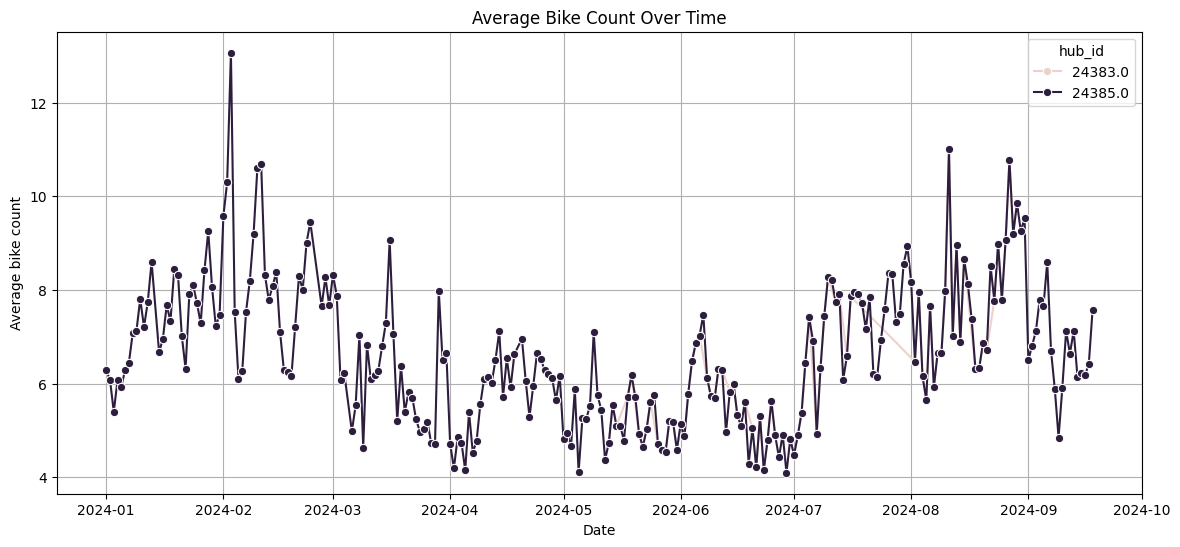

c:\Users\JustusHeilingbrunner\Documents\UNI\WS_2024_25\Application_Project\.venv\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\JustusHeilingbrunner\Documents\UNI\WS_2024_25\Application_Project\.venv\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


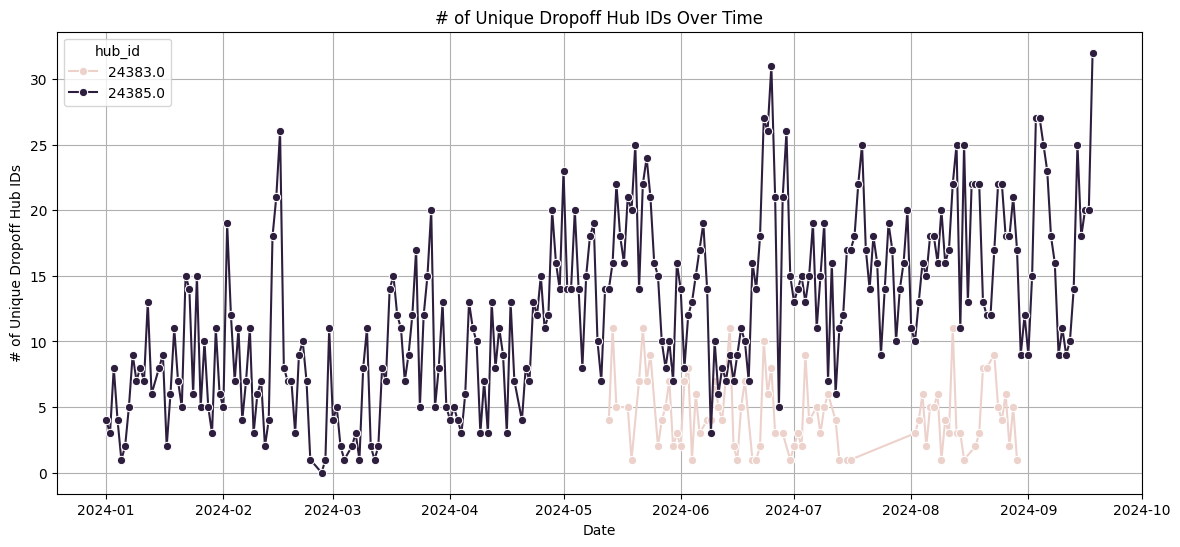

c:\Users\JustusHeilingbrunner\Documents\UNI\WS_2024_25\Application_Project\.venv\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\JustusHeilingbrunner\Documents\UNI\WS_2024_25\Application_Project\.venv\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


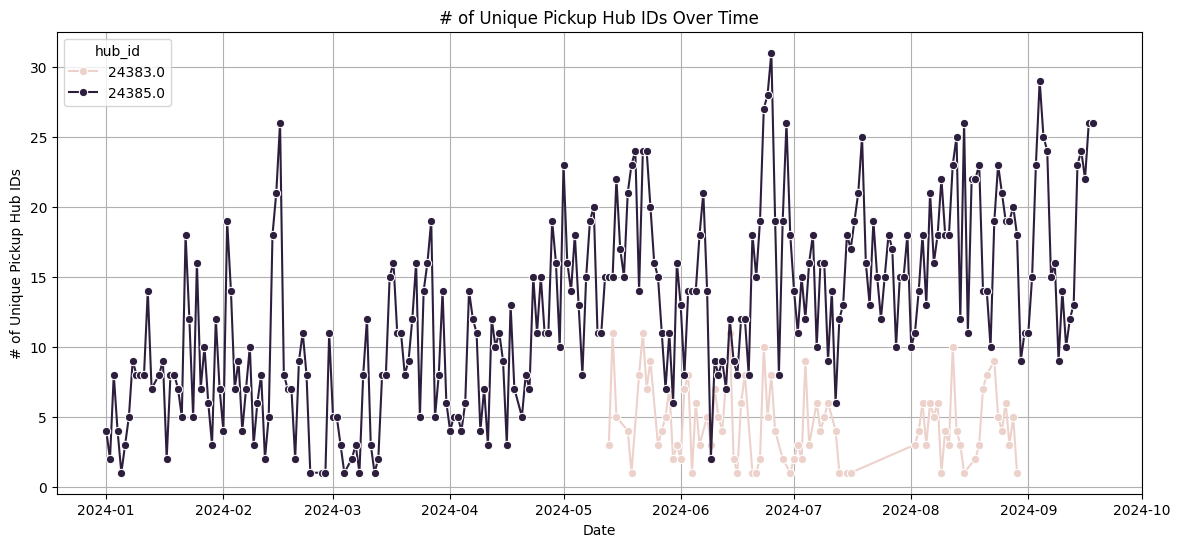

In [86]:
# Definieren Sie die Größe der Figure# Plot für Average bike_count
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_filtered, x='Days in full_date', y='Average bike_count', hue='hub_id', marker='o')
plt.title('Average Bike Count Over Time')
plt.xlabel('Date')
plt.ylabel('Average bike count')
plt.grid(True)
plt.show()

# Plot für # of unique dropoff_hub_id
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_filtered, x='Days in full_date', y='# of unique dropoff_hub_id', hue='hub_id', marker='o', color="red")
plt.title('# of Unique Dropoff Hub IDs Over Time')
plt.xlabel('Date')
plt.ylabel('# of Unique Dropoff Hub IDs')
plt.grid(True)
plt.show()

# Plot für # of unique pickup_hub_id
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_filtered, x='Days in full_date', y='# of unique pickup_hub_id', hue='hub_id', marker='o', color="blue")
plt.title('# of Unique Pickup Hub IDs Over Time')
plt.xlabel('Date')
plt.ylabel('# of Unique Pickup Hub IDs')
plt.grid(True)
plt.show()

***
***

***
***
# Requests

## .env

In [3]:
# .env
config = dotenv.dotenv_values(".env")

PASSWORD = config["PASSWORD"]

CLIENT_SECRET = config["CLIENT_SECRET"]

In [5]:
token_url = 'https://accounts.kielregion.addix.io/realms/infoportal/protocol/openid-connect/token'
headers = {
    'Content-Type': 'application/x-www-form-urlencoded'
}

data = {
    'grant_type': 'password',
    'username': 'justus.heilingbrunner@student.fh-kiel.de', 
    'password': PASSWORD,
    'client_id': 'quantumleap',
    'client_secret': CLIENT_SECRET
}

response = requests.post(token_url, headers=headers, data=data)

if response.status_code == 200:
    token_data = response.json()
    access_token = token_data['access_token']
    print(f"Bearer Token successful requested")
    if access_token:
        dotenv_path = '.env'
        
        dotenv.set_key(dotenv_path, 'ACCESS_TOKEN', access_token)
        print(f"Access Token erfolgreich in die .env-Datei geschrieben.")
else:
    print(f"Error: {response.status_code}, {response.text}")

Bearer Token successful requested
Access Token erfolgreich in die .env-Datei geschrieben.


In [4]:
config = dotenv.dotenv_values(".env")

ACCESS_TOKEN = config["ACCESS_TOKEN"]

***
## actual Request

In [89]:
# request without attrs to get all avalable attrs

url = "https://apis.kielregion.addix.io/ql/v2/entities/urn:ngsi-ld:BikeHireDockingStation:KielRegion:30151"

params = {
    'type': 'BikeHireDockingStation',
    'fromDate': '2024-09-13T00:00:00',
    'toDate': '2024-09-13T00:02:05',
    # 'attrs': 'name,location',
    # 'aggrPeriod': 'hour',
    # 'aggrMethod': 'avg'
}

headers = {
    'NGSILD-Tenant': 'infoportal',
    'Authorization': f'Bearer {ACCESS_TOKEN}'
}

response = requests.get(url, headers=headers, params=params)

if response.status_code == 200:
    response_data = response.json()
    print('got a response')
else:
    print(f"Error: {response.status_code}, {response.text}")

got a response


In [90]:
response_data

{'attributes': [{'attrName': 'address', 'values': [None, None]},
  {'attrName': 'agency_fare_url',
   'values': [None, 'https://www.donkey.bike/pricing/']},
  {'attrName': 'agency_name', 'values': [None, 'Donkey Republic Kiel']},
  {'attrName': 'agency_url',
   'values': [None, 'https://www.donkey.bike/cities/bike-rental-kiel/']},
  {'attrName': 'areaServed', 'values': [None, '866']},
  {'attrName': 'availableBikeNumber', 'values': [8, 8]},
  {'attrName': 'contactPoint',
   'values': [None,
    {'email': 'support@donkeyrepublic.com',
     'name': 'Donkey Republic Kiel',
     'telephone': '+49 30 255 585617',
     'url': 'https://www.donkey.bike/cities/bike-rental-kiel/'}]},
  {'attrName': 'description', 'values': [None, None]},
  {'attrName': 'freeSlotNumber', 'values': [7, 7]},
  {'attrName': 'location',
   'values': [None, {'coordinates': [10.127872, 54.424663], 'type': 'Point'}]},
  {'attrName': 'location_centroid', 'values': [None, '54.424663, 10.127872']},
  {'attrName': 'name', '

In [91]:
response_data['attributes']

[{'attrName': 'address', 'values': [None, None]},
 {'attrName': 'agency_fare_url',
  'values': [None, 'https://www.donkey.bike/pricing/']},
 {'attrName': 'agency_name', 'values': [None, 'Donkey Republic Kiel']},
 {'attrName': 'agency_url',
  'values': [None, 'https://www.donkey.bike/cities/bike-rental-kiel/']},
 {'attrName': 'areaServed', 'values': [None, '866']},
 {'attrName': 'availableBikeNumber', 'values': [8, 8]},
 {'attrName': 'contactPoint',
  'values': [None,
   {'email': 'support@donkeyrepublic.com',
    'name': 'Donkey Republic Kiel',
    'telephone': '+49 30 255 585617',
    'url': 'https://www.donkey.bike/cities/bike-rental-kiel/'}]},
 {'attrName': 'description', 'values': [None, None]},
 {'attrName': 'freeSlotNumber', 'values': [7, 7]},
 {'attrName': 'location',
  'values': [None, {'coordinates': [10.127872, 54.424663], 'type': 'Point'}]},
 {'attrName': 'location_centroid', 'values': [None, '54.424663, 10.127872']},
 {'attrName': 'name', 'values': [None, 'Eiche Daenischenh

***

In [104]:
url = "https://apis.kielregion.addix.io/ql/v2/entities/urn:ngsi-ld:BikeHireDockingStation:KielRegion:26889"

params = {
    'type': 'BikeHireDockingStation',
    'fromDate': '2024-06-20T01:00:00',
    'toDate': '2024-06-20T01:02:05',
    'attrs': 'name,location',
    # 'aggrPeriod': 'hour',
    # 'aggrMethod': 'avg'
}

headers = {
    'NGSILD-Tenant': 'infoportal',
    'Authorization': f'Bearer {ACCESS_TOKEN}'
}

response = requests.get(url, headers=headers, params=params)

if response.status_code == 200:
    response_data = response.json()
    print('got a response')
else:
    print(f"Error: {response.status_code}, {response.text}")

got a response


In [105]:
response_data

{'attributes': [{'attrName': 'location',
   'values': [{'coordinates': [10.121238, 54.322734], 'type': 'Point'},
    {'coordinates': [10.121238, 54.322734], 'type': 'Point'}]},
  {'attrName': 'name', 'values': ['Wilhelmplatz', 'Wilhelmplatz']}],
 'entityId': 'urn:ngsi-ld:BikeHireDockingStation:KielRegion:26889',
 'entityType': 'BikeHireDockingStation',
 'index': ['2024-06-20T01:00:29.224+00:00', '2024-06-20T01:01:29.389+00:00']}

In [19]:
response_data['attributes']

[{'attrName': 'location',
  'values': [None, {'coordinates': [10.122253, 54.341647], 'type': 'Point'}]},
 {'attrName': 'name',
  'values': [None, 'REWE digital am Wissenschaftszentrum']}]

In [20]:
response_data['attributes']['attrName'=='location']['values'][1]['coordinates']

[10.122253, 54.341647]

In [23]:
response_data['attributes']['attrName'=='peter']

{'attrName': 'location',
 'values': [None, {'coordinates': [10.122253, 54.341647], 'type': 'Point'}]}

In [29]:
for attribute in response_data['attributes']:
    if attribute['attrName'] == 'location':
        print(attribute['values'][1]['coordinates'])
    elif attribute['attrName'] == 'name':
        print(attribute['values'][1])

[10.122253, 54.341647]
[None, 'REWE digital am Wissenschaftszentrum']


***

In [14]:
def attributes_to_dataframe_with_index(data, attribute_names):
    # Dictionary to store attribute values
    extracted_data = {}
    
    # Extract entityId and entityType
    entity_id = data.get('entityId', '')
    entity_type = data.get('entityType', '')

    # Extract the number after "KielRegion" from the entityId
    match = re.search(r'KielRegion:(\d+)', entity_id)
    entity_id_number = match.group(1) if match else ''  # Get the number or set to empty if not found

    # Loop through each attribute dictionary in 'attributes'
    for attribute in data.get('attributes', []):
        attr_name = attribute.get('attrName')
        if attr_name in attribute_names:
            extracted_data[attr_name] = attribute.get('values', [])

    # Extract the index from the response
    index_values = data.get('index', [])
    
    # Create a pandas DataFrame from the dictionary
    df = pd.DataFrame(extracted_data)
    
    # Add the index values, entityId number, and entityType as new columns
    df['index'] = index_values
    df['entityId'] = entity_id_number
    df['entityType'] = entity_type
    
    # Reorder the columns to have 'index', 'entityId', and 'entityType' first if desired
    column_order = ['index', 'entityId', 'entityType'] + attribute_names
    df = df[column_order]

    return df


In [15]:

# Example usage
attribute_names = ['availableBikeNumber', 'totalSlotNumber', 'freeSlotNumber']

# Assuming 'data' is your JSON response parsed as a Python dictionary
df = attributes_to_dataframe_with_index(response_data, attribute_names)

# Display the resulting DataFrame
df

,index,entityId,entityType,availableBikeNumber,totalSlotNumber,freeSlotNumber
0,2024-09-13T00:00:17.260+00:00,29200,BikeHireDockingStation,0,NaN,15
1,2024-09-13T00:01:14.623+00:00,29200,BikeHireDockingStation,0,15.0,15
2,2024-09-13T00:02:15.055+00:00,29200,BikeHireDockingStation,0,15.0,15
3,2024-09-13T00:03:14.726+00:00,29200,BikeHireDockingStation,0,15.0,15
4,2024-09-13T00:04:14.723+00:00,29200,BikeHireDockingStation,0,15.0,15
...,...,...,...,...,...,...
1432,2024-09-13T23:55:34.725+00:00,29200,BikeHireDockingStation,0,15.0,15
1433,2024-09-13T23:56:35.605+00:00,29200,BikeHireDockingStation,0,15.0,15
1434,2024-09-13T23:57:34.861+00:00,29200,BikeHireDockingStation,0,15.0,15
1435,2024-09-13T23:58:34.972+00:00,29200,BikeHireDockingStation,0,15.0,15


***

In [139]:
# url = "https://apis.kielregion.addix.io/ql/v2/entities/urn:ngsi-ld:BikeHireDockingStation:KielRegion:26889"
url = "https://apis.kielregion.addix.io/ql/v2/entities/urn:ngsi-ld:BikeHireDockingStation:KielRegion:26889"

ids = [
    30467, 30466, 30464, 30434, 30420, 30390, 30282, 30207, 30185,
    30156, 30155, 30151, 30147, 30146, 30145, 30126, 30121, 30120,
    30095, 30084, 30027, 30026, 30025, 30024, 30023, 30022, 30011,
    29982, 29974, 29965, 29964, 29963, 29946, 29942, 29941, 29940,
    29939, 29938, 29937, 29936, 29935, 29934, 29933, 29745, 29663,
    29347, 29346, 29345, 29253, 29224, 29200, 29198, 29147, 29112,
    29109, 29083, 29049, 28932, 28814, 28813, 28812, 28811, 28804,
    28803, 28802, 28801, 28800, 28799, 28798, 28797, 28796, 28795,
    28794, 28793, 28792, 28791, 28790, 28789, 28749, 28738, 28264,
    27717, 27567, 27452, 27451, 27450, 27449, 27448, 27447, 27446,
    27445, 27444, 27443, 27442, 27441, 27440, 27382, 27381, 27380,
    27379, 27378, 27377, 27376, 27375, 27374, 27373, 27372, 27209,
    27183, 26889, 26805, 26730, 26725, 26724, 26708, 26653, 26224,
    26209, 24602, 24482, 24481, 24479, 24478, 24477, 24476, 24475,
    24474, 24473, 24472, 24471, 24470, 24469, 24468, 24467, 24466,
    24465, 24464, 24463, 24462, 24461, 24460, 24459, 24458, 24457,
    24456, 24455, 24454, 24453, 24452, 24451, 24450, 24449, 24448,
    24447, 24446, 24445, 24444, 24443, 24442, 24441, 24440, 24439,
    24438, 24437, 24436, 24435, 24434, 24433, 24432, 24431, 24430,
    24429, 24428, 24427, 24426, 24425, 24424, 24423, 24422, 24421,
    24420, 24419, 24418, 24417, 24416, 24415, 24414, 24413, 24412,
    24411, 24410, 24409, 24408, 24407, 24406, 24405, 24404, 24403,
    24402, 24401, 24400, 24399, 24398, 24397, 24396, 24395, 24394,
    24393, 24392, 24391, 24390, 24389, 24388, 24387, 24386, 24385,
    24384, 24383, 24381, 24380, 24379, 24378, 24377, 24376, 24375,
    24374, 24373, 24372, 24371, 24370, 24369, 24368, 24367
]

params = {
    'type': 'BikeHireDockingStation',
    'fromDate': '2024-09-13T00:00:00',
    'toDate': '2024-09-13T00:02:00',
    'attrs': 'name,location',
    # 'aggrPeriod': 'hour',
    # 'aggrMethod': 'avg'
    }

headers = {
    'NGSILD-Tenant': 'infoportal',
    'Authorization': f'Bearer {ACCESS_TOKEN}'
}


def get_parameter_from_response(response):
    response_data = response.json()

    for attribute in response_data['attributes']:
        if attribute['attrName'] == 'name':
            name = attribute['values'][1]
        elif attribute['attrName'] == 'location':
            location = attribute['values'][1]['coordinates']
        
    return(name, location)


# Über alle IDs iterieren und eine Anfrage für jede ID machen
results = []
for bike_id in ids:
    url = f"https://apis.kielregion.addix.io/ql/v2/entities/urn:ngsi-ld:BikeHireDockingStation:KielRegion:{bike_id}"

    try:
        response = requests.get(url, headers=headers, params=params)

        if response.status_code == 200:
            # print(f"Response received for ID {bike_id}")
            name, location = get_parameter_from_response(response)
            results.append({'ID': bike_id, 'Status': 1, 'Name': name, 'Longitude': location[0], 'Latitude': location[1]})
        else:
            # print(f"Error: {response.status_code} for ID {bike_id}")
            results.append({'ID': bike_id, 'Status': 0, 'Name': None, 'Longitude': None, 'Latitude': None})

    except requests.exceptions.RequestException as e:
        # print(f"Request failed for ID {bike_id}")
        results.append({'ID': bike_id, 'Status': 2, 'Name': None, 'Longitude': None, 'Latitude': None})


df_results = pd.DataFrame(results)
# print(df_results.head())
# 0 = response error
# 1 = response received
# 2 = request failed

# Wiederhole den Prozess für alle IDs mit Status 2
while True:
    failed_df = df_results[df_results['Status'] == 2]
    failed_ids = failed_df['ID'].tolist()

    # Breche die Schleife ab, wenn es keine fehlgeschlagenen IDs mehr gibt
    if not failed_ids:
        break

    print(f"Retrying failed requests for IDs: {failed_ids}")

    results = []
    for bike_id in failed_ids:
        url = f"https://apis.kielregion.addix.io/ql/v2/entities/urn:ngsi-ld:BikeHireDockingStation:KielRegion:{bike_id}"

        try:
            response = requests.get(url, headers=headers, params=params)

            if response.status_code == 200:
                # print(f"Response received for ID {bike_id}")
                name, location = get_parameter_from_response(response)
                results.append({'ID': bike_id, 'Status': 1, 'Name': name, 'Longitude': location[0], 'Latitude': location[1]})
            else:
                # print(f"Error: {response.status_code} for ID {bike_id}")
                results.append({'ID': bike_id, 'Status': 0, 'Name': None, 'Longitude': None, 'Latitude': None})

        except requests.exceptions.RequestException as e:
            # print(f"Request failed for ID {bike_id}")
            results.append({'ID': bike_id, 'Status': 2, 'Name': None, 'Longitude': None, 'Latitude': None})

    new_results = pd.DataFrame(results)

    # Aktualisiere den ursprünglichen DataFrame mit den neuen Ergebnissen
    for index, row in new_results.iterrows():
        # df_results.loc[df_results['ID'] == row['ID'], ['Status', 'Name', 'Location']] = row['Status'], row['Name'], row['Location']
        df_results.loc[df_results['ID'] == row['ID'], 'Status'] = row['Status']
        df_results.loc[df_results['ID'] == row['ID'], 'Name'] = row['Name']
        df_results.loc[df_results['ID'] == row['ID'], 'Longitude'] = row['Longitude']
        df_results.loc[df_results['ID'] == row['ID'], 'Latitude'] = row['Latitude']


# Endgültige Resultate anzeigen
df_results.head()

Retrying failed requests for IDs: [30155, 30126, 30121, 30022, 29974, 29964, 29939, 29937, 29935, 29200, 28932, 28812, 28811, 28804, 28798, 28795, 28791, 28749, 27567, 27449, 27448, 27440, 27377, 27373, 27372, 26730, 26724, 26708, 24474, 24471, 24470, 24466, 24464, 24452, 24449, 24444, 24440, 24433, 24429, 24427, 24421, 24418, 24414, 24413, 24411, 24409, 24404, 24403, 24398, 24391, 24384, 24378, 24374, 24369]
Retrying failed requests for IDs: [30126, 30121, 29939, 29200, 28749, 27440, 26708, 24474, 24449, 24427, 24421, 24403, 24391, 24374]
Retrying failed requests for IDs: [30121, 28749, 24449, 24421]
Retrying failed requests for IDs: [28749, 24449]


,ID,Status,Name,Longitude,Latitude
0,30467,0,None,NaN,NaN
1,30466,0,None,NaN,NaN
2,30464,1,Pop Up Rathaus event,10.132222,54.322469
3,30434,1,Felde Gemeindezentrum,9.933817,54.299552
4,30420,0,None,NaN,NaN


In [140]:
new_results

,ID,Status,Name,Longitude,Latitude
0,28749,0,None,NaN,NaN
1,24449,1,Bebelplatz,10.185079,54.294629


In [147]:
df_results['Status'].value_counts()

Status
1    204
0     29
Name: count, dtype: int64

In [148]:
df_results.to_csv('Data/response_IDs_KielRegion.csv', index=False)
# 0 = response error
# 1 = response received
# 2 = request failed

***

***
***
# Felix datensatz einlesen

In [3]:
df = pd.read_csv('FelixData_final_main_kiel.csv')
df.head()

,index,entityId,entityType,name,availableBikeNumber,freeSlotNumber,totalSlotNumber,pickups,dropoffs
0,2024-06-17T11:00:00.000+00:00,24367,BikeHireDockingStation,Anleger Dietrichsdorf,5.032787,25.000000,30.0,4627,4683
1,2024-06-17T12:00:00.000+00:00,24367,BikeHireDockingStation,Anleger Dietrichsdorf,6.762712,24.237288,30.0,4627,4683
2,2024-06-17T13:00:00.000+00:00,24367,BikeHireDockingStation,Anleger Dietrichsdorf,6.864407,24.000000,30.0,4627,4683
3,2024-06-17T14:00:00.000+00:00,24367,BikeHireDockingStation,Anleger Dietrichsdorf,5.846154,24.153846,30.0,4627,4683
4,2024-06-17T15:00:00.000+00:00,24367,BikeHireDockingStation,Anleger Dietrichsdorf,5.305556,24.694444,30.0,4627,4683


In [4]:
df['name'].nunique(), df['entityId'].nunique()

(36, 36)

In [5]:
df['name'].unique()

array(['Anleger Dietrichsdorf', 'Umsteiger', 'Alte Mu/Brunswiker Str.',
       'Alter Markt', 'Anleger Reventlou', 'Christian-Albrechts-Platz',
       'Hörnbad', 'Kirchhofallee', 'RBZ Wirtschaft', 'Vinetaplatz',
       'Westring/Eckernförder Str.', 'CAU Sportstätten', 'Dreiecksplatz',
       'Hansastr./Gutenbergstr.', 'Blücherplatz', 'Andreas-Gayk-Straße',
       'Tilsiter Platz', 'Wellingdorf Stadtteilzentrum', 'Hauptbahnhof',
       'Exerzierplatz', 'thyssenkrupp Marine Systems',
       'MEKUN Olympiahochhaus', 'Bernhard-Minetti-Platz',
       'KVG Betriebshof Diedrichstraße', 'Sophienhof', 'ADAC-Station',
       'Förde Sparkasse Lorentzendamm', 'Studiale', 'UKSH', 'Sandkrug',
       'Zur Fähre', 'Seefischmarkt', 'Krausstraße',
       'Kieler Innovations- und Technologiezentrum',
       ' Wik, Kanalfähre - Busstation', 'Wilhelmplatz'], dtype=object)

In [6]:
df['entityId'].unique()

array([24367, 24368, 24369, 24370, 24371, 24373, 24375, 24376, 24379,
       24380, 24381, 24383, 24385, 24389, 24391, 24392, 24393, 24395,
       24397, 24399, 24408, 24412, 24413, 24415, 24417, 24419, 24436,
       24457, 24465, 24466, 24467, 24469, 24471, 24481, 26224, 26889],
      dtype=int64)

# Station: Alter Markt

In [7]:
df_alter_markt = df.loc[df['entityId'] == 24370]
df_alter_markt = df_alter_markt.reset_index(drop=True)
df_alter_markt['index'] = pd.to_datetime(df_alter_markt['index'])

In [8]:
df_alter_markt.head()

,index,entityId,entityType,name,availableBikeNumber,freeSlotNumber,totalSlotNumber,pickups,dropoffs
0,2024-06-17 11:00:00+00:00,24370,BikeHireDockingStation,Alter Markt,10.098361,13.000000,25.0,15439,15676
1,2024-06-17 12:00:00+00:00,24370,BikeHireDockingStation,Alter Markt,8.508475,14.491525,25.0,15439,15676
2,2024-06-17 13:00:00+00:00,24370,BikeHireDockingStation,Alter Markt,10.898305,12.203390,25.0,15439,15676
3,2024-06-17 14:00:00+00:00,24370,BikeHireDockingStation,Alter Markt,11.181818,12.000000,25.0,15439,15676
4,2024-06-17 15:00:00+00:00,24370,BikeHireDockingStation,Alter Markt,10.555556,12.444444,25.0,15439,15676


In [9]:
df_alter_markt.shape

(2413, 9)

In [10]:
df_alter_markt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2413 entries, 0 to 2412
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   index                2413 non-null   datetime64[ns, UTC]
 1   entityId             2413 non-null   int64              
 2   entityType           2413 non-null   object             
 3   name                 2413 non-null   object             
 4   availableBikeNumber  2413 non-null   float64            
 5   freeSlotNumber       2413 non-null   float64            
 6   totalSlotNumber      2413 non-null   float64            
 7   pickups              2413 non-null   int64              
 8   dropoffs             2413 non-null   int64              
dtypes: datetime64[ns, UTC](1), float64(3), int64(3), object(2)
memory usage: 169.8+ KB


In [11]:
df_alter_markt['index'].iloc[0], df_alter_markt['index'].iloc[-1]

(Timestamp('2024-06-17 11:00:00+0000', tz='UTC'),
 Timestamp('2024-09-30 23:00:00+0000', tz='UTC'))

In [12]:
df_alter_markt_model = df_alter_markt[['index', 'availableBikeNumber', 'freeSlotNumber']]

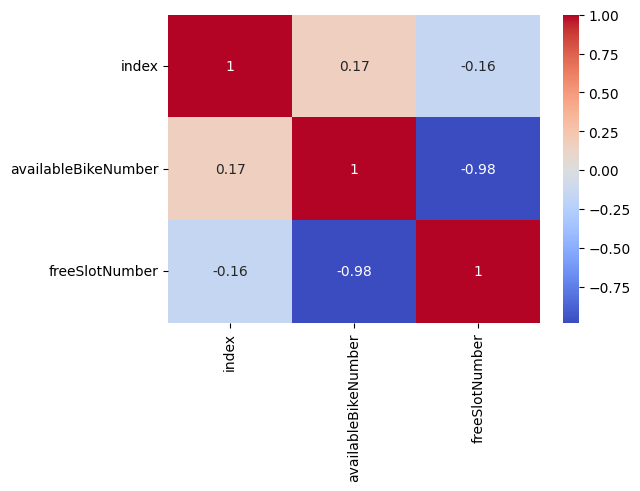

In [13]:
corr_matrix = df_alter_markt_model.corr()

plt.figure(figsize=(6,4)) 
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

In [14]:
df_alter_markt_model = df_alter_markt_model[['index', 'availableBikeNumber']]
df_alter_markt_model.head()

# nice to have: temp, wind speed, rainfall, sunshine?, Holiday, Student Holiday, Seasons, unique dropoffs, unique pickups

,index,availableBikeNumber
0,2024-06-17 11:00:00+00:00,10.098361
1,2024-06-17 12:00:00+00:00,8.508475
2,2024-06-17 13:00:00+00:00,10.898305
3,2024-06-17 14:00:00+00:00,11.181818
4,2024-06-17 15:00:00+00:00,10.555556


## First try

- nur index spalte als nummer umgewandelt

In [162]:
target = df_alter_markt_model.loc[:, ["availableBikeNumber"]]
data = df_alter_markt_model.drop("availableBikeNumber", axis=1)

print(data.shape)
data.head()

(2413, 1)


,index
0,2024-06-17 11:00:00+00:00
1,2024-06-17 12:00:00+00:00
2,2024-06-17 13:00:00+00:00
3,2024-06-17 14:00:00+00:00
4,2024-06-17 15:00:00+00:00


In [163]:
# X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.4, shuffle=True, random_state=1)

train_size = int(len(data) * 0.8)
X_train = data[:train_size]
X_test = data[train_size:]
y_train = target[:train_size]
y_test = target[train_size:]

In [164]:
for i in (X_train, X_test, y_train, y_test):
    print(i.shape)

(1930, 1)
(483, 1)
(1930, 1)
(483, 1)


In [165]:
X_train_processed = X_train['index'].apply(lambda x: x.timestamp()).to_numpy().reshape(-1, 1)
X_test_processed = X_test['index'].apply(lambda x: x.timestamp()).to_numpy().reshape(-1, 1)

In [166]:
y_scaler = MinMaxScaler()
# X_scaler = MinMaxScaler()

# X_train_processed=X_scaler.fit_transform(X_train_processed)
# X_test_processed=X_scaler.transform(X_test_processed)

y_train_sc=y_scaler.fit_transform(y_train)
y_test_sc=y_scaler.transform(y_test)

In [167]:
X_train_tensor=torch.Tensor(X_train_processed)
X_test_tensor=torch.Tensor(X_test_processed)
y_train_tensor=torch.Tensor(y_train_sc)
y_test_tensor=torch.Tensor(y_test_sc)

In [168]:
class MultiLayerPerceptron(nn.Module):

    def __init__(self, input_size):
        super(MultiLayerPerceptron, self).__init__()
                
        self.hidden_1 = nn.Linear(input_size, 128)
        self.hidden_2 = nn.Linear(128, 64)
        self.hidden_3 = nn.Linear(64, 32)
        self.output = nn.Linear(32,1)
        self.activation=nn.PReLU()
 
    def forward(self, x):

        out1 = self.activation(self.hidden_1(x))
        out2 = self.activation(self.hidden_2(out1))
        out3 = self.activation(self.hidden_3(out2))
        
        return self.output(out3)

In [169]:
def train_model(model, X_train, y_train, criterion, optimizer, epochs):
    model.train()

    for epoch in range(epochs):
        y_train_pred = model(X_train)
        optimizer.zero_grad()

        train_loss = criterion(y_train_pred, y_train)

        train_loss.backward()

        optimizer.step()

        if (epoch % 100==99):
            print("Epoch: %d, loss: %1.5f" % (epoch, train_loss.item()))

In [170]:
criterion = torch.nn.MSELoss()
learning_rate=0.01
epochs=1000

In [171]:
torch.manual_seed(1)
dummy_model=MultiLayerPerceptron(X_train.shape[1])
optimizer = torch.optim.Adam(dummy_model.parameters(), lr=learning_rate)
train_model(dummy_model, X_train_tensor, y_train_tensor, criterion, optimizer, epochs)

Epoch: 99, loss: 332964986880.00000
Epoch: 199, loss: 5741838.50000
Epoch: 299, loss: 805.20581
Epoch: 399, loss: 656.77136
Epoch: 499, loss: 655.87561
Epoch: 599, loss: 655.87561
Epoch: 699, loss: 655.87561
Epoch: 799, loss: 655.87561
Epoch: 899, loss: 655.87561
Epoch: 999, loss: 655.87561


In [172]:
results = pd.DataFrame()

In [173]:
# Use a dataframe to collect general evaluation results
try:
    results
except NameError:
    results = pd.DataFrame()

dummy_model.eval()
y_train_pred=y_scaler.inverse_transform(mads_dl.predict(dummy_model, X_train_tensor))
y_test_pred=y_scaler.inverse_transform(mads_dl.predict(dummy_model, X_test_tensor))
results = mads_dl.add_regression_eval(results, "first test", 
                   y_train, y_train_pred, 
                   y_test, y_test_pred,
                   mads_dl.count_params(dummy_model)
                  )

In [174]:
# results[results.dataset=="train"]\
# .sort_values("MAPE", ascending=False)\
# .round(2)
results.head()

,algorithm,dataset,MSE,MAE,MAPE,params
0,first test,train,405561.418465,505.024344,2.055359e+19,10626
1,first test,test,403047.858609,510.611464,4.138635e+18,10626


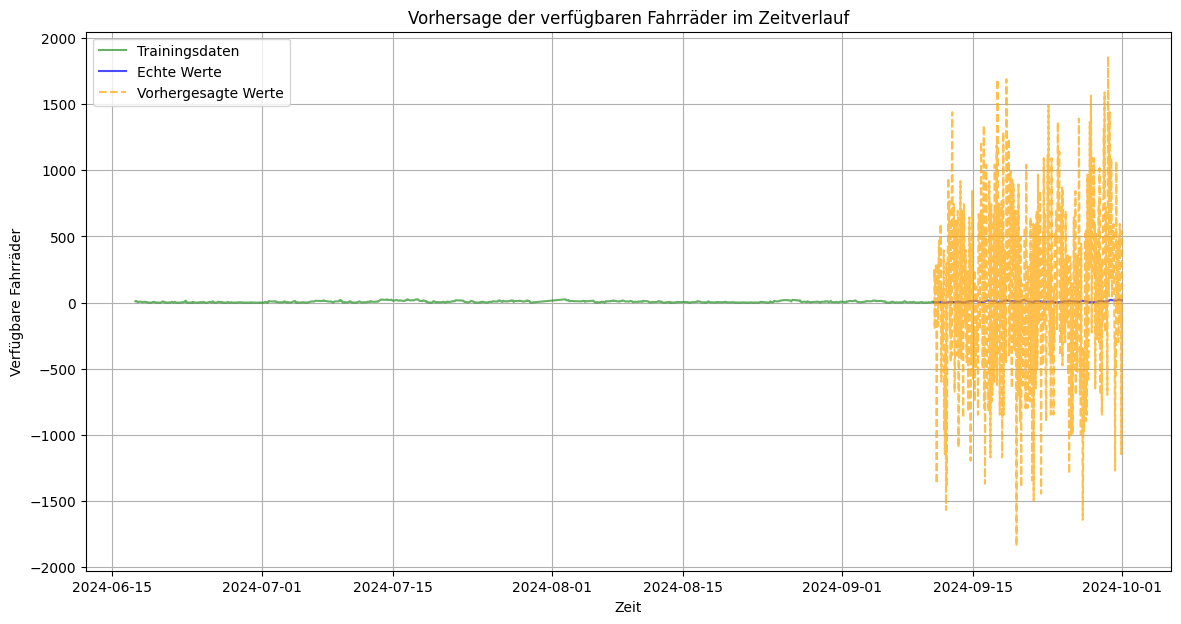

In [175]:
# Plot erstellen
plt.figure(figsize=(14, 7))

# Originale Trainingsdaten markieren (X_train als Zeitdaten)
plt.plot(X_train, y_train, label='Trainingsdaten', color='green', alpha=0.6)

# Originale Daten plotten (aus y_test) gegen die Zeit
plt.plot(X_test, y_test, label='Echte Werte', color='blue', alpha=0.7)

# Vorhergesagte Daten plotten (aus y_predictions_original) gegen die Zeit
plt.plot(X_test, y_test_pred, label='Vorhergesagte Werte', color='orange', linestyle='--', alpha=0.7)

# Zusätzliche Darstellungseinstellungen
plt.title("Vorhersage der verfügbaren Fahrräder im Zeitverlauf")
plt.xlabel("Zeit")
plt.ylabel("Verfügbare Fahrräder")
plt.legend()
plt.grid(True)

# Diagramm anzeigen
plt.show()

## Second try

- mehr spalten, feature engeneering

In [176]:
df_alter_markt_model_2 = df_alter_markt_model.copy()

df_alter_markt_model_2['index'] = pd.to_datetime(df_alter_markt_model_2['index'])

# Features erzeugen
df_alter_markt_model_2['Year'] = df_alter_markt_model_2['index'].dt.year
df_alter_markt_model_2['Month'] = df_alter_markt_model_2['index'].dt.month
df_alter_markt_model_2['Day'] = df_alter_markt_model_2['index'].dt.day
df_alter_markt_model_2['Hour'] = df_alter_markt_model_2['index'].dt.hour  # Stunde des Tages im 24-Stunden-Format
df_alter_markt_model_2['Season'] = df_alter_markt_model_2['index'].dt.month % 12 // 3 + 1  # Jahreszeit (1=Winter, 2=Frühling, 3=Sommer, 4=Herbst)
df_alter_markt_model_2['Weekend'] = df_alter_markt_model_2['index'].dt.weekday >= 5  # Boolescher Wert für Wochenende (Samstag=5, Sonntag=6)
df_alter_markt_model_2['DayOfWeek'] = df_alter_markt_model_2['index'].dt.dayofweek
df_alter_markt_model_2['DayOfYear'] = df_alter_markt_model_2['index'].dt.dayofyear


# Ausgabe anzeigen
df_alter_markt_model_2

,index,availableBikeNumber,Year,Month,Day,Hour,Season,Weekend,DayOfWeek,DayOfYear
0,2024-06-17 11:00:00+00:00,10.098361,2024,6,17,11,3,False,0,169
1,2024-06-17 12:00:00+00:00,8.508475,2024,6,17,12,3,False,0,169
2,2024-06-17 13:00:00+00:00,10.898305,2024,6,17,13,3,False,0,169
3,2024-06-17 14:00:00+00:00,11.181818,2024,6,17,14,3,False,0,169
4,2024-06-17 15:00:00+00:00,10.555556,2024,6,17,15,3,False,0,169
...,...,...,...,...,...,...,...,...,...,...
2408,2024-09-30 19:00:00+00:00,19.733333,2024,9,30,19,4,False,0,274
2409,2024-09-30 20:00:00+00:00,18.283333,2024,9,30,20,4,False,0,274
2410,2024-09-30 21:00:00+00:00,18.000000,2024,9,30,21,4,False,0,274
2411,2024-09-30 22:00:00+00:00,18.066667,2024,9,30,22,4,False,0,274


In [177]:
# df = pd.get_dummies(df, columns=['Season'], prefix='Season')
df_alter_markt_model_2_dummified = pd.get_dummies(df_alter_markt_model_2, columns=['Season', 'DayOfWeek'], prefix=['Season', 'DayOfWeek'], drop_first=True)

print(df_alter_markt_model_2_dummified.shape)
df_alter_markt_model_2_dummified.head()

(2413, 15)


,index,availableBikeNumber,Year,Month,Day,Hour,Weekend,DayOfYear,Season_4,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6
0,2024-06-17 11:00:00+00:00,10.098361,2024,6,17,11,False,169,False,False,False,False,False,False,False
1,2024-06-17 12:00:00+00:00,8.508475,2024,6,17,12,False,169,False,False,False,False,False,False,False
2,2024-06-17 13:00:00+00:00,10.898305,2024,6,17,13,False,169,False,False,False,False,False,False,False
3,2024-06-17 14:00:00+00:00,11.181818,2024,6,17,14,False,169,False,False,False,False,False,False,False
4,2024-06-17 15:00:00+00:00,10.555556,2024,6,17,15,False,169,False,False,False,False,False,False,False


In [178]:
target = df_alter_markt_model_2_dummified.loc[:, ["availableBikeNumber"]]
data = df_alter_markt_model_2_dummified.drop(['index', 'availableBikeNumber'], axis=1)

print(data.shape)
data.head()

(2413, 13)


,Year,Month,Day,Hour,Weekend,DayOfYear,Season_4,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6
0,2024,6,17,11,False,169,False,False,False,False,False,False,False
1,2024,6,17,12,False,169,False,False,False,False,False,False,False
2,2024,6,17,13,False,169,False,False,False,False,False,False,False
3,2024,6,17,14,False,169,False,False,False,False,False,False,False
4,2024,6,17,15,False,169,False,False,False,False,False,False,False


In [179]:
# X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.4, shuffle=True, random_state=1)

train_size = int(len(data) * 0.8)
X_train = data[:train_size]
X_test = data[train_size:]
y_train = target[:train_size]
y_test = target[train_size:]

In [180]:
for i in (X_train, X_test, y_train, y_test):
    print(i.shape)

(1930, 13)
(483, 13)
(1930, 1)
(483, 1)


In [181]:
y_scaler = MinMaxScaler()
X_scaler = MinMaxScaler()

X_train_sc = X_scaler.fit_transform(X_train)
X_test_sc = X_scaler.transform(X_test)

y_train_sc = y_scaler.fit_transform(y_train)
y_test_sc = y_scaler.transform(y_test)

In [182]:
X_train_tensor=torch.Tensor(X_train_sc)
X_test_tensor=torch.Tensor(X_test_sc)
y_train_tensor=torch.Tensor(y_train_sc)
y_test_tensor=torch.Tensor(y_test_sc)

In [183]:
class MultiLayerPerceptron(nn.Module):

    def __init__(self, input_size):
        super(MultiLayerPerceptron, self).__init__()
                
        self.hidden_1 = nn.Linear(input_size, 128)
        self.hidden_2 = nn.Linear(128, 64)
        self.hidden_3 = nn.Linear(64, 32)
        self.output = nn.Linear(32,1)
        self.activation=nn.PReLU()
 
    def forward(self, x):

        out1 = self.activation(self.hidden_1(x))
        out2 = self.activation(self.hidden_2(out1))
        out3 = self.activation(self.hidden_3(out2))
        
        return self.output(out3)

In [184]:
def train_model(model, X_train, y_train, criterion, optimizer, epochs):
    model.train()

    for epoch in range(epochs):
        y_train_pred = model(X_train)
        optimizer.zero_grad()

        train_loss = criterion(y_train_pred, y_train)

        train_loss.backward()

        optimizer.step()

        if (epoch % 100==99):
            print("Epoch: %d, loss: %1.5f" % (epoch, train_loss.item()))

In [185]:
criterion = torch.nn.MSELoss()
learning_rate=0.01
epochs=1000

In [186]:
torch.manual_seed(1)
dummy_model=MultiLayerPerceptron(X_train.shape[1])
optimizer = torch.optim.Adam(dummy_model.parameters(), lr=learning_rate)
train_model(dummy_model, X_train_tensor, y_train_tensor, criterion, optimizer, epochs)

Epoch: 99, loss: 0.01986
Epoch: 199, loss: 0.00696
Epoch: 299, loss: 0.00594
Epoch: 399, loss: 0.00321
Epoch: 499, loss: 0.00320
Epoch: 599, loss: 0.00308
Epoch: 699, loss: 0.00362
Epoch: 799, loss: 0.00334
Epoch: 899, loss: 0.00141
Epoch: 999, loss: 0.00143


In [187]:
try:
    results
except NameError:
    results = pd.DataFrame()

dummy_model.eval()
y_train_pred=y_scaler.inverse_transform(mads_dl.predict(dummy_model, X_train_tensor))
y_test_pred=y_scaler.inverse_transform(mads_dl.predict(dummy_model, X_test_tensor))
results = mads_dl.add_regression_eval(results, "second test", 
                   y_train, y_train_pred, 
                   y_test, y_test_pred,
                   mads_dl.count_params(dummy_model)
                  )

In [188]:
results.head()

,algorithm,dataset,MSE,MAE,MAPE,params
0,first test,train,405561.418465,505.024344,2.055359e+19,10626
1,first test,test,403047.858609,510.611464,4.138635e+18,10626
2,second test,train,0.831161,0.651325,1.287253e+16,12162
3,second test,test,168.461700,11.649507,4.257067e+16,12162


In [189]:
X_train

,Year,Month,Day,Hour,Weekend,DayOfYear,Season_4,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6
0,2024,6,17,11,False,169,False,False,False,False,False,False,False
1,2024,6,17,12,False,169,False,False,False,False,False,False,False
2,2024,6,17,13,False,169,False,False,False,False,False,False,False
3,2024,6,17,14,False,169,False,False,False,False,False,False,False
4,2024,6,17,15,False,169,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1925,2024,9,10,16,False,254,True,True,False,False,False,False,False
1926,2024,9,10,17,False,254,True,True,False,False,False,False,False
1927,2024,9,10,18,False,254,True,True,False,False,False,False,False
1928,2024,9,10,19,False,254,True,True,False,False,False,False,False


C:\Users\JustusHeilingbrunner\AppData\Local\Temp\ipykernel_16676\4203211030.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['datetime'] = pd.to_datetime(X_train[['Year', 'Month', 'Day', 'Hour']])
C:\Users\JustusHeilingbrunner\AppData\Local\Temp\ipykernel_16676\4203211030.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['datetime'] = pd.to_datetime(X_test[['Year', 'Month', 'Day', 'Hour']])


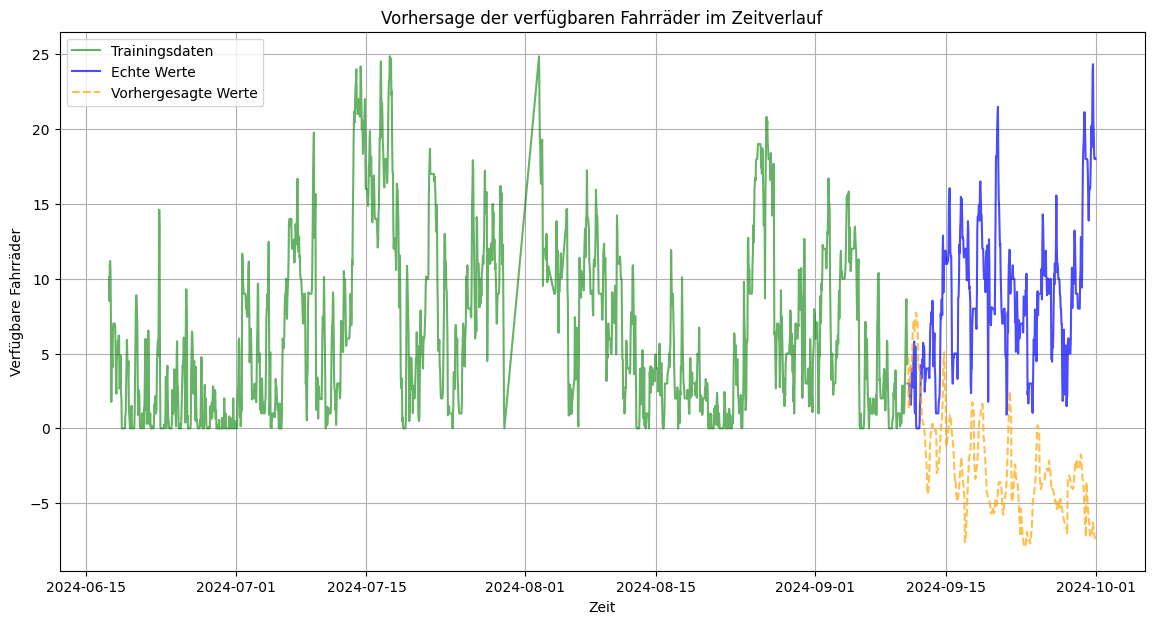

In [190]:
X_train['datetime'] = pd.to_datetime(X_train[['Year', 'Month', 'Day', 'Hour']])
X_test['datetime'] = pd.to_datetime(X_test[['Year', 'Month', 'Day', 'Hour']])

# Plot erstellen
plt.figure(figsize=(14, 7))

# Originale Trainingsdaten markieren
plt.plot(X_train['datetime'], y_train, label='Trainingsdaten', color='green', alpha=0.6)

# Originale Testdaten plotten
plt.plot(X_test['datetime'], y_test, label='Echte Werte', color='blue', alpha=0.7)

# Vorhergesagte Testwerte plotten
plt.plot(X_test['datetime'], y_test_pred, label='Vorhergesagte Werte', color='orange', linestyle='--', alpha=0.7)

# Zusätzliche Darstellungseinstellungen
plt.title("Vorhersage der verfügbaren Fahrräder im Zeitverlauf")
plt.xlabel("Zeit")
plt.ylabel("Verfügbare Fahrräder")
plt.legend()
plt.grid(True)

# Diagramm anzeigen
plt.show()

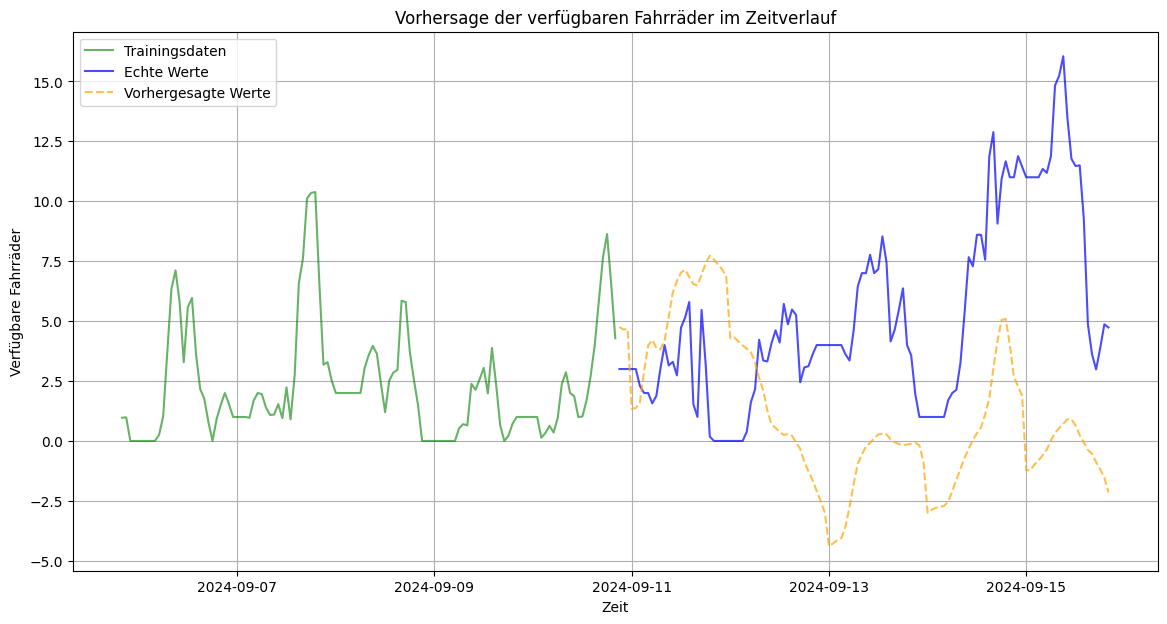

In [198]:
total_points = len(X_train) + len(X_test)

# Calculate indices for 75% and 85% marks
start_index = int(0.75 * total_points)
end_index = int(0.05 * total_points)
# end_index = start_index + end_index

# Plot erstellen
plt.figure(figsize=(14, 7))

# Originale Trainingsdaten markieren
plt.plot(X_train['datetime'].iloc[start_index:], y_train[start_index:], label='Trainingsdaten', color='green', alpha=0.6)

# Originale Testdaten plotten
plt.plot(X_test['datetime'].iloc[:end_index], y_test[:end_index], label='Echte Werte', color='blue', alpha=0.7)

# Vorhergesagte Testwerte plotten
plt.plot(X_test['datetime'].iloc[:end_index], y_test_pred[:end_index], label='Vorhergesagte Werte', color='orange', linestyle='--', alpha=0.7)

# Zusätzliche Darstellungseinstellungen
plt.title("Vorhersage der verfügbaren Fahrräder im Zeitverlauf")
plt.xlabel("Zeit")
plt.ylabel("Verfügbare Fahrräder")
plt.legend()
plt.grid(True)

# Diagramm anzeigen
plt.show()

## Third test

- train test split shuffeld

In [199]:
target = df_alter_markt_model_2_dummified.loc[:, ["availableBikeNumber"]]
data = df_alter_markt_model_2_dummified.drop(['index', 'availableBikeNumber'], axis=1)

print(data.shape)
data.head()

(2413, 13)


,Year,Month,Day,Hour,Weekend,DayOfYear,Season_4,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6
0,2024,6,17,11,False,169,False,False,False,False,False,False,False
1,2024,6,17,12,False,169,False,False,False,False,False,False,False
2,2024,6,17,13,False,169,False,False,False,False,False,False,False
3,2024,6,17,14,False,169,False,False,False,False,False,False,False
4,2024,6,17,15,False,169,False,False,False,False,False,False,False


In [200]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.4, shuffle=True, random_state=1)


In [201]:
for i in (X_train, X_test, y_train, y_test):
    print(i.shape)

(1447, 13)
(966, 13)
(1447, 1)
(966, 1)


In [202]:
y_scaler = MinMaxScaler()
X_scaler = MinMaxScaler()

X_train_sc = X_scaler.fit_transform(X_train)
X_test_sc = X_scaler.transform(X_test)

y_train_sc = y_scaler.fit_transform(y_train)
y_test_sc = y_scaler.transform(y_test)

In [203]:
X_train_tensor=torch.Tensor(X_train_sc)
X_test_tensor=torch.Tensor(X_test_sc)
y_train_tensor=torch.Tensor(y_train_sc)
y_test_tensor=torch.Tensor(y_test_sc)

In [204]:
class MultiLayerPerceptron(nn.Module):

    def __init__(self, input_size):
        super(MultiLayerPerceptron, self).__init__()
                
        self.hidden_1 = nn.Linear(input_size, 128)
        self.hidden_2 = nn.Linear(128, 64)
        self.hidden_3 = nn.Linear(64, 32)
        self.output = nn.Linear(32,1)
        self.activation=nn.PReLU()
 
    def forward(self, x):

        out1 = self.activation(self.hidden_1(x))
        out2 = self.activation(self.hidden_2(out1))
        out3 = self.activation(self.hidden_3(out2))
        
        return self.output(out3)

In [205]:
def train_model(model, X_train, y_train, criterion, optimizer, epochs):
    model.train()

    for epoch in range(epochs):
        y_train_pred = model(X_train)
        optimizer.zero_grad()

        train_loss = criterion(y_train_pred, y_train)

        train_loss.backward()

        optimizer.step()

        if (epoch % 100==99):
            print("Epoch: %d, loss: %1.5f" % (epoch, train_loss.item()))

In [206]:
criterion = torch.nn.MSELoss()
learning_rate=0.01
epochs=1000

In [207]:
torch.manual_seed(1)
dummy_model=MultiLayerPerceptron(X_train.shape[1])
optimizer = torch.optim.Adam(dummy_model.parameters(), lr=learning_rate)
train_model(dummy_model, X_train_tensor, y_train_tensor, criterion, optimizer, epochs)

Epoch: 99, loss: 0.02755
Epoch: 199, loss: 0.01004
Epoch: 299, loss: 0.00458
Epoch: 399, loss: 0.00322
Epoch: 499, loss: 0.00287
Epoch: 599, loss: 0.00228
Epoch: 699, loss: 0.00174
Epoch: 799, loss: 0.00267
Epoch: 899, loss: 0.00134
Epoch: 999, loss: 0.00178


In [208]:
try:
    results
except NameError:
    results = pd.DataFrame()

dummy_model.eval()
y_train_pred=y_scaler.inverse_transform(mads_dl.predict(dummy_model, X_train_tensor))
y_test_pred=y_scaler.inverse_transform(mads_dl.predict(dummy_model, X_test_tensor))
results = mads_dl.add_regression_eval(results, "third test", 
                   y_train, y_train_pred, 
                   y_test, y_test_pred,
                   mads_dl.count_params(dummy_model)
                  )

In [209]:
results.head(6)

,algorithm,dataset,MSE,MAE,MAPE,params
0,first test,train,405561.418465,505.024344,2.055359e+19,10626
1,first test,test,403047.858609,510.611464,4.138635e+18,10626
2,second test,train,0.831161,0.651325,1.287253e+16,12162
3,second test,test,168.461700,11.649507,4.257067e+16,12162
4,third test,train,1.023896,0.777296,1.922833e+16,12162
5,third test,test,2.828815,1.209526,2.586745e+16,12162


In [210]:
X_train

,Year,Month,Day,Hour,Weekend,DayOfYear,Season_4,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6
982,2024,7,28,9,True,210,False,False,False,False,False,False,True
1418,2024,8,20,13,False,233,False,True,False,False,False,False,False
1593,2024,8,27,20,False,240,False,True,False,False,False,False,False
1759,2024,9,3,18,False,247,True,True,False,False,False,False,False
1713,2024,9,1,20,True,245,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,2024,7,27,11,True,209,False,False,False,False,False,True,False
905,2024,7,25,4,False,207,False,False,False,True,False,False,False
1096,2024,8,6,22,False,219,False,True,False,False,False,False,False
235,2024,6,27,6,False,179,False,False,False,True,False,False,False


In [211]:
# wie kann man das besser darstellen. ich möchte die trainings und test daten verbinden und die predictions

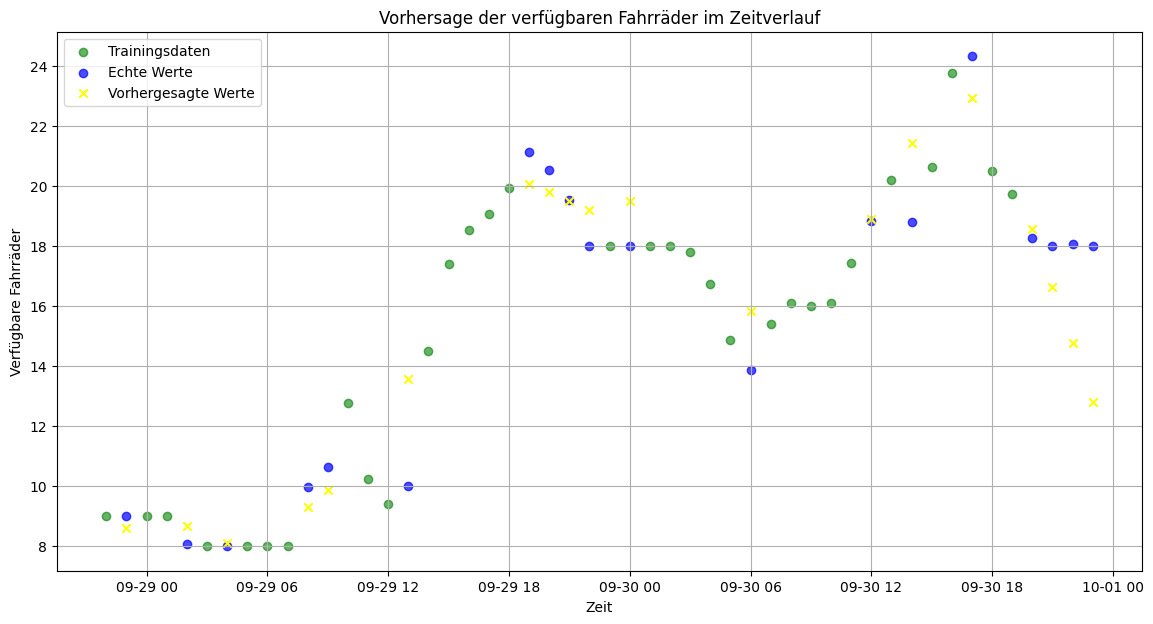

In [212]:
X_train['datetime'] = pd.to_datetime(X_train[['Year', 'Month', 'Day', 'Hour']])
X_test['datetime'] = pd.to_datetime(X_test[['Year', 'Month', 'Day', 'Hour']])

# Kombiniere Train und Test für das Sortieren, getrennte Analyse aber weiterhin möglich
# combined = pd.concat([X_train, X_test])
# combined['target_train'] = pd.concat([y_train])
# combined['target_test'] = pd.concat([y_test])

# combined_sorted = combined.sort_values(by='datetime')

combined_train = X_train.copy()
combined_train['target_train'] = y_train
combined_test = X_test.copy()
combined_test['target_test'] = y_test
combined_test['pred'] = y_test_pred

combined_sorted = pd.concat([combined_train, combined_test]).sort_values(by='datetime')

last_x_points = combined_sorted.tail(50)

# Plot erstellen
plt.figure(figsize=(14, 7))

# Originale Trainingsdaten markieren
# plt.scatter(last_x_points['datetime'], last_x_points['target_train'], label='Trainingsdaten', color='green', alpha=0.6)
plt.scatter(last_x_points['datetime'], last_x_points['target_train'], label='Trainingsdaten', color='green', alpha=0.6)

# Originale Testdaten plotten
# plt.scatter(last_x_points['datetime'], last_x_points['target_test'], label='Echte Werte', color='blue', alpha=0.7)
plt.scatter(last_x_points['datetime'], last_x_points['target_test'], color='blue', alpha=0.7, label='Echte Werte')

# Vorhergesagte Testwerte plotten
# plt.plot(combined_sorted['datetime'], combined_sorted['pred'], label='Vorhergesagte Werte', color='orange', linestyle='--', alpha=0.7)
plt.scatter(last_x_points['datetime'], last_x_points['pred'], label='Vorhergesagte Werte', color='yellow', marker='x')

# Zusätzliche Darstellungseinstellungen
plt.title("Vorhersage der verfügbaren Fahrräder im Zeitverlauf")
plt.xlabel("Zeit")
plt.ylabel("Verfügbare Fahrräder")
plt.legend()
plt.grid(True)

# Diagramm anzeigen
plt.show()

***
## geo data test

c:\Users\JustusHeilingbrunner\Documents\UNI\WS_2024_25\Application_Project_2024\.venv\Lib\site-packages\osmnx\features.py:300: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  polygon = gdf_place["geometry"].unary_union


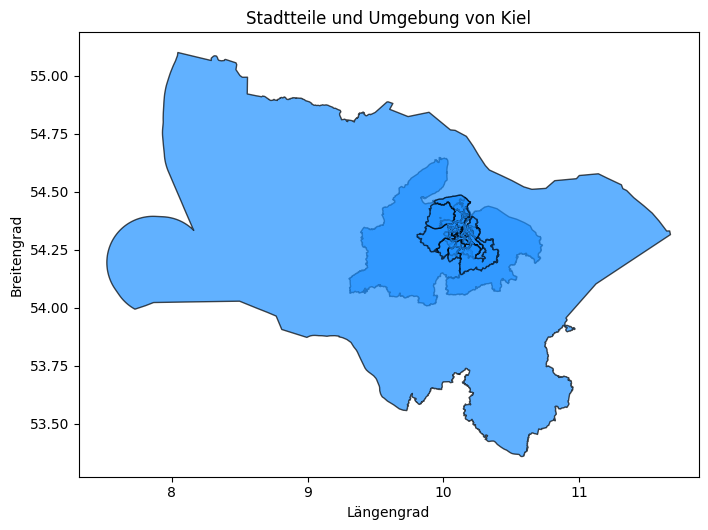

In [ ]:
# Definiere den Ort zur Abfrage ("place")
place_name = "Kiel, Germany"

# Bestimme die tags zum Abrufen von administrativen Grenzen (z.B. Stadtteile)
tags = {'boundary': 'administrative', 'admin_level': ['6','10']}

# Lade die Features basierend auf diesen Tags in dem Gebiet um Kiel
# Ein häufig verwendeter Trick ist, ganz Schleswig-Holstein zu nehmen und es später zu filtern:
boundary_gdf = ox.geocode_to_gdf(place_name)
kiel_and_surroundings = ox.features_from_place(place_name, tags=tags)

# Plotten, um die Sichtbarkeit der Zonierung zu zeigen
fig, ax = plt.subplots(figsize=(8, 8))
boundary_gdf.plot(ax=ax, color='lightgray', edgecolor='black', linewidth=2)
kiel_and_surroundings.plot(ax=ax, color='dodgerblue', edgecolor='black', linewidth=1, alpha=0.7)

# Anpassen und Anzeigen des Plots
plt.title('Stadtteile und Umgebung von Kiel')
plt.xlabel('Längengrad')
plt.ylabel('Breitengrad')
plt.show()

In [ ]:
tags = {'building': True}
geo_test = ox.features_from_point(
    center_point=(54.322469, 10.132222),
    tags=tags,
    dist=1000)
geo_test = geo_test.reset_index()
# geo_test = geo_test[geo_test.element_type=='relation']
# geo_test = geo_test[['name','geometry']]

In [ ]:
geo_test.head(2)

,element_type,osmid,geometry,opening_hours,access,level,wheelchair,material,amenity,operator,...,bar,frequency,shelter_type,playground,construction,ways,police,type,name:etymology:wikidata,loc_name
0,node,8860572219,POINT (10.12421 54.32084),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,node,8860572222,POINT (10.12405 54.32099),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
